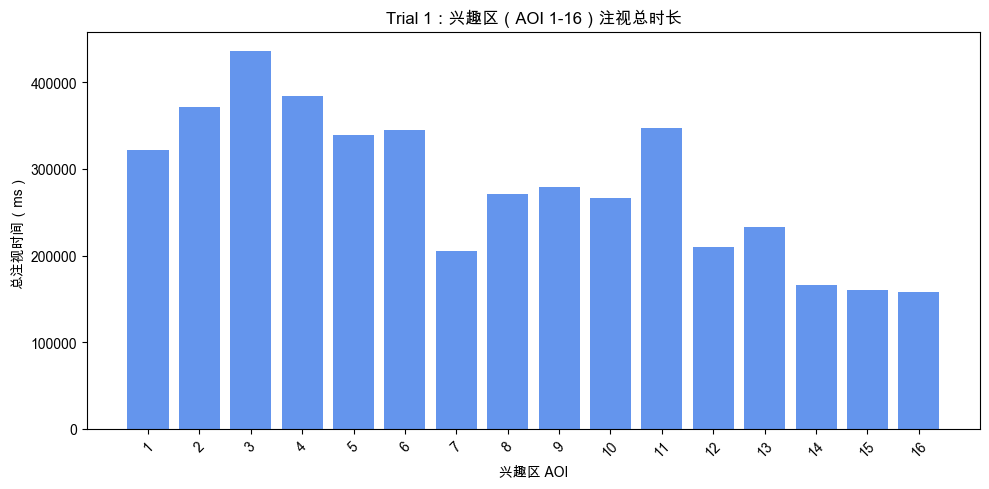

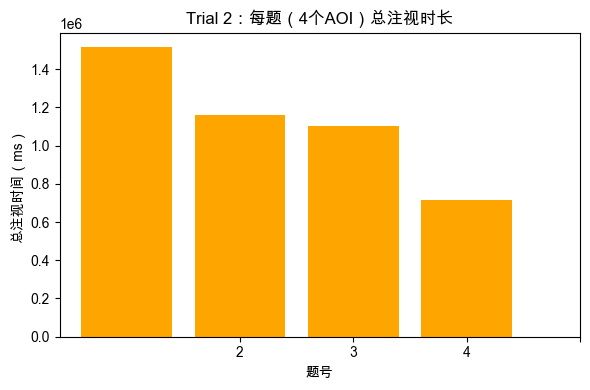

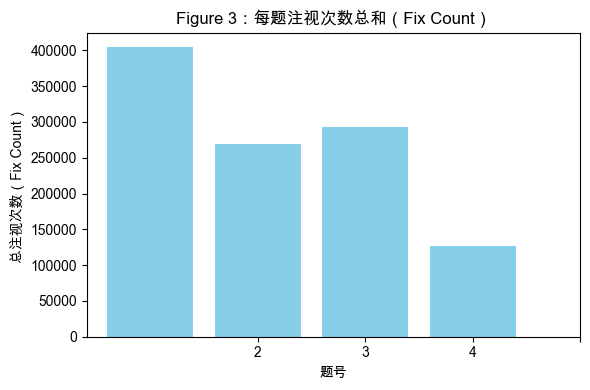

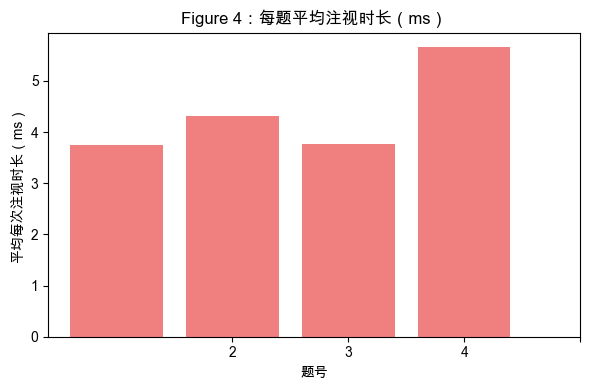

ÊØèÈ¢òÁöÑÊ≥®ËßÜÊÄªÊó∂ÈïøÔºàmsÔºâÔºö
1    1514073
2    1160650
3    1102349
4     716136
dtype: int64

ÊØèÈ¢òÁöÑÊ≥®ËßÜÊÄªÊ¨°Êï∞ÔºàFix CountÔºâÔºö
1    404325
2    269411
3    293247
4    126553
dtype: int64

ÊØèÈ¢òÁöÑÂπ≥ÂùáÊØèÊ¨°Ê≥®ËßÜÊó∂ÈïøÔºàmsÔºâÔºö
1    3.744693
2    4.308102
3    3.759114
4    5.658783
dtype: float64


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] #mac ‰∏≠ÊñáÂ≠ó‰ΩìÔºåWindows ÂèØÂ∞ÜArial Unicode MSÊõøÊç¢‰∏∫Microsoft YaHei

# ËØªÂèñÊï∞ÊçÆ
df = pd.read_excel("Listening_FixationReport_Raw.xlsx")  # ‰øÆÊîπ‰∏∫‰Ω†ÁöÑÂÆûÈôÖË∑ØÂæÑ
df.columns = df.columns.str.strip()  # Ê∏ÖÁêÜÂàóÂêçÁ©∫Ê†º

# ‰ªÖÁ≠õÈÄâ Trial 1
df_trial1 = df[df["TRIAL_INDEX"] == 1].copy()

# ÂéªÈô§Êó†ÊïàËÆ∞ÂΩïÔºà‰æãÂ¶Ç AOI‰∏∫Á©∫ÔºåÊàñÊ≥®ËßÜÊó∂Èïø‰∏∫0Ôºâ
df_trial1 = df_trial1[
    df_trial1["CURRENT_FIX_INTEREST_AREAS"].notnull() &
    (df_trial1["CURRENT_FIX_DURATION"] > 0)
].copy()

# ÊèêÂèñÂÖ¥Ë∂£Âå∫ÁºñÂè∑ÔºàÂ¶Ç [ 5] -> 5ÔºâÔºåËΩ¨‰∏∫Êï¥Âûã
df_trial1["AOI_ID"] = df_trial1["CURRENT_FIX_INTEREST_AREAS"].astype(str).str.extract(r"\[ *(\d+) *\]").astype(float).astype("Int64")

# Á≠õÈÄâ AOI Âú® 1~16 ËåÉÂõ¥ÂÜÖÁöÑ
df_trial1 = df_trial1[df_trial1["AOI_ID"].between(1, 16)]

# ===== ÂàÜÊûê 1ÔºöÁªüËÆ°ÊØè‰∏™ AOI ÁöÑÊÄªÊ≥®ËßÜÊó∂Èïø =====
aoi_durations = df_trial1.groupby("AOI_ID")["CURRENT_FIX_DURATION"].sum()

# ÂèØËßÜÂåñÔºöAOI 1~16 Ê≥®ËßÜÊÄªÊó∂Èïø
plt.figure(figsize=(10, 5))
plt.bar(aoi_durations.index.astype(str), aoi_durations.values, color="cornflowerblue")
plt.title("Trial 1ÔºöÂÖ¥Ë∂£Âå∫ÔºàAOI 1-16ÔºâÊ≥®ËßÜÊÄªÊó∂Èïø")
plt.xlabel("ÂÖ¥Ë∂£Âå∫ AOI")
plt.ylabel("ÊÄªÊ≥®ËßÜÊó∂Èó¥ÔºàmsÔºâ")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ===== ÂàÜÊûê 2ÔºöÂêàÂπ∂‰∏∫4ÈÅìÈ¢òÔºåÊØèÈ¢òÂåÖÂê´4‰∏™AOI =====
question_groups = {
    1: list(range(1, 5)),
    2: list(range(5, 9)),
    3: list(range(9, 13)),
    4: list(range(13, 17)),
}

# Ê±áÊÄªÊØèÈÅìÈ¢òÁöÑÊ≥®ËßÜÊÄªÊó∂Èó¥
q_durations = {
    q: df_trial1[df_trial1["AOI_ID"].isin(aois)]["CURRENT_FIX_DURATION"].sum()
    for q, aois in question_groups.items()
}
q_series = pd.Series(q_durations)

# ÂèØËßÜÂåñÔºöÊØèÈ¢òÊÄªÊ≥®ËßÜÊó∂Èïø
plt.figure(figsize=(6, 4))
plt.bar(q_series.index.astype(str), q_series.values, color="orange")
plt.title("Trial 2ÔºöÊØèÈ¢òÔºà4‰∏™AOIÔºâÊÄªÊ≥®ËßÜÊó∂Èïø")
plt.xlabel("È¢òÂè∑")
plt.ylabel("ÊÄªÊ≥®ËßÜÊó∂Èó¥ÔºàmsÔºâ")
plt.xticks([1, 2, 3, 4])
plt.tight_layout()
plt.show()

# ===== ÂàÜÊûê 3ÔºöÊØèÈ¢òÁöÑÊ≥®ËßÜÊ¨°Êï∞ÔºàFix CountÔºâ =====
q_fix_counts = {
    q: df_trial1[df_trial1["AOI_ID"].isin(aois)]["CURRENT_FIX_INTEREST_AREA_FIX_COUNT"].sum()
    for q, aois in question_groups.items()
}
fix_series = pd.Series(q_fix_counts)

# ===== Âõæ3ÔºöÊØèÈ¢òÁöÑÊ≥®ËßÜÊ¨°Êï∞ =====
plt.figure(figsize=(6, 4))
plt.bar(fix_series.index.astype(str), fix_series.values, color="skyblue")
plt.title("Figure 3ÔºöÊØèÈ¢òÊ≥®ËßÜÊ¨°Êï∞ÊÄªÂíåÔºàFix CountÔºâ")
plt.xlabel("È¢òÂè∑")
plt.ylabel("ÊÄªÊ≥®ËßÜÊ¨°Êï∞ÔºàFix CountÔºâ")
plt.xticks([1, 2, 3, 4])
plt.tight_layout()
plt.show()

# ===== Âõæ4ÔºöÊØèÈ¢òÂπ≥ÂùáÊØèÊ¨°Ê≥®ËßÜÊåÅÁª≠Êó∂Èó¥Ôºà=ÊÄªÊó∂Èïø/Ê≥®ËßÜÊ¨°Êï∞Ôºâ =====
# ÈÅøÂÖçÈô§‰ª•0ÔºåÂÅö‰∏™‰øùÊä§
avg_duration = q_series / fix_series.replace(0, pd.NA)
plt.figure(figsize=(6, 4))
plt.bar(avg_duration.index.astype(str), avg_duration.values, color="lightcoral")
plt.title("Figure 4ÔºöÊØèÈ¢òÂπ≥ÂùáÊ≥®ËßÜÊó∂ÈïøÔºàmsÔºâ")
plt.xlabel("È¢òÂè∑")
plt.ylabel("Âπ≥ÂùáÊØèÊ¨°Ê≥®ËßÜÊó∂ÈïøÔºàmsÔºâ")
plt.xticks([1, 2, 3, 4])
plt.tight_layout()
plt.show()

# ===== ËæìÂá∫Ê±áÊÄªË°® =====
print("ÊØèÈ¢òÁöÑÊ≥®ËßÜÊÄªÊó∂ÈïøÔºàmsÔºâÔºö")
print(q_series)

print("\nÊØèÈ¢òÁöÑÊ≥®ËßÜÊÄªÊ¨°Êï∞ÔºàFix CountÔºâÔºö")
print(fix_series)

print("\nÊØèÈ¢òÁöÑÂπ≥ÂùáÊØèÊ¨°Ê≥®ËßÜÊó∂ÈïøÔºàmsÔºâÔºö")
print(avg_duration)

# üßæ ÁúºÂä®Êï∞ÊçÆÂàÜÊûêËÑöÊú¨ËØ¶Ëß£ÔºàTrial 1Ôºâ

Êú¨ËäÇËÆ≤Ëß£‰∏ÄÊÆµÂÆåÊï¥ÁöÑ Python ËÑöÊú¨ÔºåÁî®‰∫éÂàÜÊûêÁúºÂä®ÂÆûÈ™åÊï∞ÊçÆÔºå‰∏ªË¶ÅÂåÖÊã¨Ôºö
- Êï∞ÊçÆËØªÂèñ‰∏éÊ∏ÖÊ¥ó
- ÊèêÂèñÂÖ¥Ë∂£Âå∫ÁºñÂè∑
- ÊåâÂÖ¥Ë∂£Âå∫ÂíåÈ¢òÁõÆÁªüËÆ°Ê≥®ËßÜÊÄªÊó∂ÈïøÂíåÊ¨°Êï∞
- ÂèØËßÜÂåñÂ±ïÁ§∫

---

## üìö Á¨¨‰∏ÄÈÉ®ÂàÜÔºöÂØºÂÖ•Â∫ì‰∏éËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰Ωì

```python
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
```

### üîç Ëß£ÈáäÔºö
- ÂØºÂÖ• `pandas` Âíå `matplotlib.pyplot`„ÄÇ
- ËÆæÁΩÆÁªòÂõæ‰∏≠ÊñáÂ≠ó‰ΩìÔºö
  - macOS ‰ΩøÁî® `'Arial Unicode MS'`
  - Windows Êé®Ëçê‰ΩøÁî® `'Microsoft YaHei'`

---

## üìÅ Á¨¨‰∫åÈÉ®ÂàÜÔºöËØªÂèñÂπ∂Ê∏ÖÁêÜÊï∞ÊçÆ

```python
df = pd.read_excel("Listening_FixationReport_Raw.xlsx")
df.columns = df.columns.str.strip()
```

### üß† ÂäüËÉΩËØ¥ÊòéÔºö
- ‰ªé Excel Êñá‰ª∂‰∏≠ËØªÂèñÁúºÂä®Êï∞ÊçÆ„ÄÇ
- ÂéªÈô§ÂàóÂêç‰∏§Á´ØÁöÑÁ©∫Ê†ºÔºåÈò≤Ê≠¢ÂêéÁª≠Êìç‰ΩúÂõ†Á©∫Ê†ºÂá∫Èîô„ÄÇ

---

## üîç Á¨¨‰∏âÈÉ®ÂàÜÔºöÁ≠õÈÄâÁõÆÊ†á Trial ÂíåÊúâÊïàÊï∞ÊçÆ

```python
df_trial1 = df[df["TRIAL_INDEX"] == 1].copy()

df_trial1 = df_trial1[
    df_trial1["CURRENT_FIX_INTEREST_AREAS"].notnull() &
    (df_trial1["CURRENT_FIX_DURATION"] > 0)
].copy()
```

### üß† ÂäüËÉΩËØ¥ÊòéÔºö
- Á≠õÈÄâÂá∫ `TRIAL_INDEX == 1` ÁöÑËØïÈ™åÊï∞ÊçÆ„ÄÇ
- ËøáÊª§ÊéâÊó†ÊïàËÆ∞ÂΩïÔºö
  - ÂÖ¥Ë∂£Âå∫‰∏∫Á©∫Ôºà`CURRENT_FIX_INTEREST_AREAS` ‰∏∫ `NaN`Ôºâ
  - Ê≥®ËßÜÊó∂Èïø‰∏∫ 0 ÁöÑÊó†ÊïàËÆ∞ÂΩï

---

## üî¢ Á¨¨ÂõõÈÉ®ÂàÜÔºöÊèêÂèñ AOI ÁºñÂè∑Âπ∂ËøáÊª§ËåÉÂõ¥

```python
df_trial1["AOI_ID"] = df_trial1["CURRENT_FIX_INTEREST_AREAS"].astype(str).str.extract(r"\[ *(\d+) *\]").astype(float).astype("Int64")

df_trial1 = df_trial1[df_trial1["AOI_ID"].between(1, 16)]
```

### üß† ÂäüËÉΩËØ¥ÊòéÔºö
- Â∞ÜÁ±ª‰ºº `[ 5]` ÁöÑÂ≠óÁ¨¶‰∏≤ÊèêÂèñ‰∏∫Êï¥Êï∞ `5`Ôºå‰Ωú‰∏∫Êñ∞ÁöÑ `AOI_ID` Âàó„ÄÇ
- ËøáÊª§Âè™‰øùÁïô AOI ÁºñÂè∑Âú® 1~16 ËåÉÂõ¥ÂÜÖÁöÑÊï∞ÊçÆ„ÄÇ

---

## üìä ÂàÜÊûê 1ÔºöÁªüËÆ°ÊØè‰∏™ AOI ÁöÑÊÄªÊ≥®ËßÜÊó∂Èïø

```python
aoi_durations = df_trial1.groupby("AOI_ID")["CURRENT_FIX_DURATION"].sum()
```

### üß† ÂäüËÉΩËØ¥ÊòéÔºö
- ÊåâÂÖ¥Ë∂£Âå∫ ID ÂàÜÁªÑÔºåÁªüËÆ°ÊØèÁªÑÁöÑÊÄªÊ≥®ËßÜÊó∂Èó¥„ÄÇ

---

## üìà ÂèØËßÜÂåñ 1ÔºöÊØè‰∏™ AOI ÁöÑÊ≥®ËßÜÊÄªÊó∂Èïø

```python
plt.figure(figsize=(10, 5))
plt.bar(aoi_durations.index.astype(str), aoi_durations.values, color="cornflowerblue")
plt.title("Trial 1ÔºöÂÖ¥Ë∂£Âå∫ÔºàAOI 1-16ÔºâÊ≥®ËßÜÊÄªÊó∂Èïø")
plt.xlabel("ÂÖ¥Ë∂£Âå∫ AOI")
plt.ylabel("ÊÄªÊ≥®ËßÜÊó∂Èó¥ÔºàmsÔºâ")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
```

### üß† ÂäüËÉΩËØ¥ÊòéÔºö
- ÁªòÂà∂Êü±Áä∂ÂõæÔºåÊòæÁ§∫ÊØè‰∏™ AOI ÁöÑÊÄªÊ≥®ËßÜÊó∂Èó¥„ÄÇ
- ËÆæÁΩÆÂõæË°®Â§ßÂ∞è„ÄÅÊ†áÈ¢ò„ÄÅÂùêÊ†áËΩ¥Ê†áÁ≠æÂíåËá™Âä®Â∏ÉÂ±Ä„ÄÇ

---

## üìê ÂàÜÊûê 2ÔºöÂ∞Ü AOI ÂêàÂπ∂‰∏∫ 4 ÈÅìÈ¢òËøõË°åÁªüËÆ°

```python
question_groups = {
    1: list(range(1, 5)),
    2: list(range(5, 9)),
    3: list(range(9, 13)),
    4: list(range(13, 17)),
}

q_durations = {
    q: df_trial1[df_trial1["AOI_ID"].isin(aois)]["CURRENT_FIX_DURATION"].sum()
    for q, aois in question_groups.items()
}
q_series = pd.Series(q_durations)
```

### üß† ÂäüËÉΩËØ¥ÊòéÔºö
- ÂÆö‰πâÊØèÈÅìÈ¢òÂåÖÂê´ÁöÑ AOI Âå∫ÂüüÔºàÂ¶ÇÈ¢ò 1 ÂØπÂ∫î AOI 1~4Ôºâ„ÄÇ
- Ê±áÊÄªÊØèÈÅìÈ¢òÁöÑÊÄªÊ≥®ËßÜÊó∂Èó¥„ÄÇ

---

## üìà ÂèØËßÜÂåñ 2ÔºöÊØèÈÅìÈ¢òÁöÑÊ≥®ËßÜÊÄªÊó∂Èïø

```python
plt.figure(figsize=(6, 4))
plt.bar(q_series.index.astype(str), q_series.values, color="orange")
plt.title("Trial 1ÔºöÊØèÈ¢òÔºà4‰∏™AOIÔºâÊÄªÊ≥®ËßÜÊó∂Èïø")
plt.xlabel("È¢òÂè∑")
plt.ylabel("ÊÄªÊ≥®ËßÜÊó∂Èó¥ÔºàmsÔºâ")
plt.xticks([1, 2, 3, 4])
plt.tight_layout()
plt.show()
```

### üß† ÂäüËÉΩËØ¥ÊòéÔºö
- ÁªòÂà∂Êü±Áä∂ÂõæÔºåÊòæÁ§∫ÊØèÈÅìÈ¢òÁöÑÊÄªÊ≥®ËßÜÊó∂Èó¥„ÄÇ

---

## üîç ÂàÜÊûê 3ÔºöÁªüËÆ°ÊØèÈ¢òÁöÑÊ≥®ËßÜÊ¨°Êï∞ÔºàFix CountÔºâ

```python
q_fix_counts = {
    q: df_trial1[df_trial1["AOI_ID"].isin(aois)]["CURRENT_FIX_INTEREST_AREA_FIX_COUNT"].sum()
    for q, aois in question_groups.items()
}
fix_series = pd.Series(q_fix_counts)
```

### üß† ÂäüËÉΩËØ¥ÊòéÔºö
- ÁªüËÆ°ÊØèÈÅìÈ¢òÂØπÂ∫îÁöÑÁ¥ØËÆ°Ê≥®ËßÜÊ¨°Êï∞ÔºàÊù•Ëá™ `CURRENT_FIX_INTEREST_AREA_FIX_COUNT` Â≠óÊÆµÔºâ„ÄÇ

---

## üìà Âõæ3ÔºöÊØèÈ¢òÁöÑÊ≥®ËßÜÊ¨°Êï∞ÊÄªÂíåÔºàFix CountÔºâ

```python
plt.figure(figsize=(6, 4))
plt.bar(fix_series.index.astype(str), fix_series.values, color="skyblue")
plt.title("Trial 1ÔºöÊØèÈ¢òÊ≥®ËßÜÊ¨°Êï∞ÊÄªÂíåÔºàFix CountÔºâ")
plt.xlabel("È¢òÂè∑")
plt.ylabel("ÊÄªÊ≥®ËßÜÊ¨°Êï∞ÔºàFix CountÔºâ")
plt.xticks([1, 2, 3, 4])
plt.tight_layout()
plt.show()
```

### üß† ÂäüËÉΩËØ¥ÊòéÔºö
- ‰ΩøÁî® `fix_series`Ôºà‰πãÂâçËÆ°ÁÆóÂ•ΩÁöÑÊØèÈ¢òÊ≥®ËßÜÊ¨°Êï∞ÔºâÁªòÂà∂Êü±Áä∂Âõæ„ÄÇ
- ËÆæÁΩÆÂõæË°®Â§ßÂ∞è„ÄÅÊ†áÈ¢ò„ÄÅÂùêÊ†áËΩ¥Ê†áÁ≠æÂíåÂàªÂ∫¶„ÄÇ
- ÂèØËßÜÂåñÂ±ïÁ§∫ÊØèÈÅìÈ¢òÁöÑÁ¥ØËÆ°Ê≥®ËßÜÊ¨°Êï∞„ÄÇ

---

## ‚öñÔ∏è Âõæ4ÔºöÊØèÈ¢òÂπ≥ÂùáÊØèÊ¨°Ê≥®ËßÜÊåÅÁª≠Êó∂Èó¥

```python
avg_duration = q_series / fix_series.replace(0, pd.NA)
plt.figure(figsize=(6, 4))
plt.bar(avg_duration.index.astype(str), avg_duration.values, color="lightcoral")
plt.title("Trial 1ÔºöÊØèÈ¢òÂπ≥ÂùáÊ≥®ËßÜÊó∂ÈïøÔºàmsÔºâ")
plt.xlabel("È¢òÂè∑")
plt.ylabel("Âπ≥ÂùáÊØèÊ¨°Ê≥®ËßÜÊó∂ÈïøÔºàmsÔºâ")
plt.xticks([1, 2, 3, 4])
plt.tight_layout()
plt.show()
```

### üß† ÂäüËÉΩËØ¥ÊòéÔºö
- ËÆ°ÁÆóÊØèÈ¢òÁöÑ‚ÄúÂπ≥ÂùáÊØèÊ¨°Ê≥®ËßÜÊó∂Èïø‚ÄùÔºö
  - ÂÖ¨Âºè‰∏∫ÔºöÊÄªÊ≥®ËßÜÊó∂Èïø √∑ ÊÄªÊ≥®ËßÜÊ¨°Êï∞
  - ‰ΩøÁî® `.replace(0, pd.NA)` ÈÅøÂÖçÈô§‰ª•Èõ∂ÈîôËØØ
- ÁªòÂà∂Êü±Áä∂ÂõæÊòæÁ§∫ÊØèÈ¢òÁöÑÂπ≥ÂùáÊ≥®ËßÜÊó∂ÈïøÔºåÂ∏ÆÂä©ËØÜÂà´Ê≥®ÊÑèÂäõÈõÜ‰∏≠Á®ãÂ∫¶„ÄÇ

---

## üñ®Ô∏è ËæìÂá∫Ê±áÊÄªË°®

```python
print("ÊØèÈ¢òÁöÑÊ≥®ËßÜÊÄªÊó∂ÈïøÔºàmsÔºâÔºö")
print(q_series)

print("\nÊØèÈ¢òÁöÑÊ≥®ËßÜÊÄªÊ¨°Êï∞ÔºàFix CountÔºâÔºö")
print(fix_series)

print("\nÊØèÈ¢òÁöÑÂπ≥ÂùáÊØèÊ¨°Ê≥®ËßÜÊó∂ÈïøÔºàmsÔºâÔºö")
print(avg_duration)
```

### üß† ÂäüËÉΩËØ¥ÊòéÔºö
- ÊâìÂç∞‰∏âÁªÑÁªüËÆ°ÁªìÊûúÔºåÁî®‰∫éÊü•ÁúãÊàñÂØºÂá∫Ôºö
  - ÊØèÈ¢òÁöÑÊÄªÊ≥®ËßÜÊó∂Èó¥
  - ÊØèÈ¢òÁöÑÊÄªÊ≥®ËßÜÊ¨°Êï∞
  - ÊØèÈ¢òÁöÑÂπ≥ÂùáÊ≥®ËßÜÊó∂Èïø

---

ÊòØÂê¶ÈúÄË¶ÅÊàëÂ∏Æ‰Ω†Â∞ÜËøôÊÆµÂÜÖÂÆπÊï¥ÂêàÂà∞ÂÆåÊï¥ÁöÑ `.ipynb` Êñá‰ª∂‰∏≠ÔºüÊàñËÄÖÊ∑ªÂä†‰øùÂ≠òÂõæÂÉè„ÄÅÂ§ö Trial ÂàÜÊûêÁ≠âÂäüËÉΩÔºü````

‰Ω†ÂèØ‰ª•Â§çÂà∂‰ª•‰∏äÂÜÖÂÆπÂà∞ Jupyter Notebook ÁöÑ Markdown ÂçïÂÖÉÊ†º‰∏≠Áõ¥Êé•‰ΩøÁî®„ÄÇÂ¶ÇÊûúÈúÄË¶ÅÊàë‰∏∫‰Ω†ÁîüÊàêÂõæÂÉè‰øùÂ≠òÂäüËÉΩÊàñË°•ÂÖÖÂºÇÂ∏∏Â§ÑÁêÜÈÄªËæëÔºåËØ∑ÂëäËØâÊàë„ÄÇ